In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from iris_dataset import df as iris_df
from perceptron_classifier import Perceptron_Classifier
from matplotlib.colors import ListedColormap
import pprint as pprint


# Perceptron classifier

The perceptron classifier is a type of supervised learning algorithm used for binary classification. The perceptron classifier makes predictions by assigning weights to input features and taking a weighted sum.  It then applies a threshold function to the sum to produce a prediction of either 0 or 1. 

Whilst it is an efficient and simple algorithm, it does not perform well when the two classes of data do not have a linear seperation boundary. Therefore, whilst it's good for simple datasets, the algorithm can fail to converge with more complex datasets. In practice, other algorithms would be preferred over perceptron for binary classification problems in industry (e.g., SVM, logistic regression, Naive Bayes).

## Steps to implementing perceptron

1. **Initialize the weights**

Weights are initialized as small random values. Typically drawn from a normal distribution with a mean 0, and a small standard deviation (e.g., 0.01). Weights are essentially the parameters that establish the decision boundaries between the two classes of data, and correspond to features of the dataset. The importance of each weight determines the prediction of the perceptron. When the training is ongoing, these weights will be continually updated to find the best decision boundary.

2. **Calculate the net input**

For each training example (e.g., In house price prediction model, for each house...) calculate the net input. If we have a training set with n examples and m features, the weight vector w is a 1D array of length m+1 (where the extra dimension corresponds to the bias term). Each element of the weight vector w is multiplied by its corresponding feature in the input data, and the results are summed up to produce the net input to the perceptron.
        1. Multiply the features by their corresponding weights
        2. Sum the results
        
3. **Apply the activation function (threshold function)**

The net input is then passed through the threshold function, which returns either 1 or -1 depending on whether the net input is above or below a certain threshold.

4. **Update the weights**

If the predicted output does not match the desired output for a given training example, the weights are updated to correct the prediction. This is done by adding or subtracting the product of the learning rate (learning_rate) and the error to each weight. The learning rate will decide how much the weights will be updated in every iteration. This is usually set to a small value. If it is too large, the algorithm can fail to converge. If it is too small, it may take a long time for the algorithm to converge. 

**Repeat steps 1 to 4 for every training example until the algorithm converges**


6. **Return weights**:

Once the algorithm has converged or the maximum number of iterations (n_iter) is reached, the weights are returned. These weights can then be used to predict classifications for unseen data. 

In [ ]:
class Perceptron_Classifier(object):
    '''
    Parameters
    -------------
    learning_rate : float
        Learning rate (between 0.0 and 1.0). Decides how much the weights are updated in each iter. (typically, small).
    n_iter : int
        Number of iterations over the training dataset. 
    random_seed : int
        Random number generator seed for random weight initialization (
    Attributes
    -------------
    These attributes are used to keep track of the Perceptron object.

    w_ : 1d_array
        Weights after fitting. Stores the weights learned during training
    errors_ : list
        Number of misclassifications (updates) in each epoch (training iteration)
    '''
    def __init__(self, learning_rate=0.01, n_iter=50, random_seed=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_seed = random_seed
    
    def fit(self, X, y):
        """
        Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors. 2-dimensional array where n_examples is the 
            number of training examples and n_features is the number of features for each example
        y : array-like, shape = [n_examples]
            Target values. 1-dimensional array of shape [n_examples] containing the corresponding target output values for each example.

        ***note: Capitalisation of X and y is done to distinguish between input features and output targets.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_seed)
        self.w_ = rgen.normal (loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        '''
        Calculate the net input of the perceptron.

        Parameters:
        -----------
        X : {array-like}, shape = [n_examples, n_features]
            Input data.

        Returns:
        --------
        net_input : numpy array, shape = [n_examples]
            Net input calculated as the dot product of the input data and the 
            weight coefficients of the perceptron, plus the bias unit.
        '''        
        return np.dot(X,self.w_[1:]) + self.w_[0]

    def predict(self, X):
        '''
        Return the predicted class labels after applying the Heaviside (classfy as either 1 or -1) step function.

        Parameters:
        -----------
        X : {array-like}, shape = [n_examples, n_features]
            Input data.

        Returns:
        --------
        y_pred : numpy array, shape = [n_examples]
            Predicted class labels after applying the Heaviside step function.
            Class labels are either 1 or -1.
        '''
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Training a perceptron using the Iris dataset

The iris dataset is a famous labelled dataset that contains the measurements of four features of three different species of iris flowers (verticolor, setosa, and virginica). The four features are the length and width of the sepals and petals. There are a total of 150 flower examples, 50 for each species.


In [10]:
iris_df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Plotting the features of versicolor and setosa

We'll train the model using the sepal and petal length as the input features.

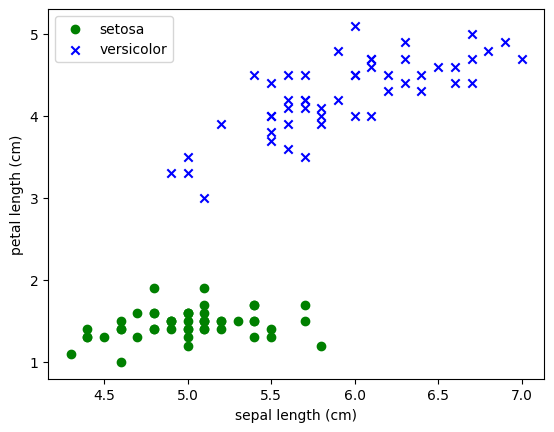

In [20]:
# Select setosa and versicolor and transform them to 1s (versicolor) and -1s (setosa)
y = iris_df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)

# Extract features (sepal-0 and petal length-2)
X = iris_df.iloc[0:100, [0,2]].values

# Plotting setosa and versicolor petal (y axis) and sepal (x axis) length
plt.scatter(X[:50, 0], X[:50, 1],
            color='green', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')

plt.show()



From the above plot, we can see the distribution of flower examples. We can also see that a linear classification should be sufficient to classify versicolors and sertosas...

## Training the perceptron


Text(0, 0.5, 'Number of updates to weights (misclassifications)')

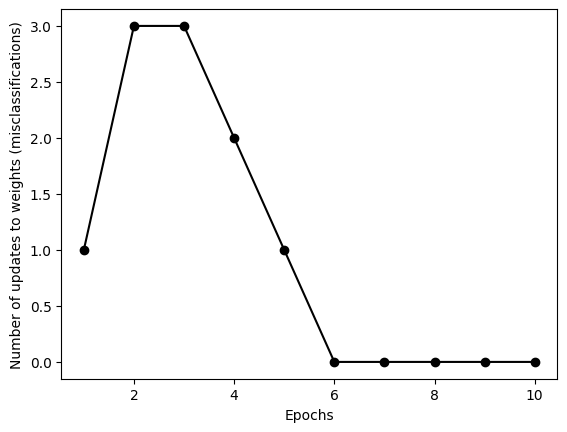

In [25]:
plt.cla()

ppn = Perceptron_Classifier(learning_rate=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, color='black', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates to weights (misclassifications)')


From the above plot, we can see that after the 6th epoch, the model converges (i.e., weights no longer need to be updated).
To more clearly visualise the convergence, we can plot seperation boundaries between the verticolor and sertosa classes. 


C:\Users\Chris\AppData\Local\Temp\ipykernel_2680\1947311215.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


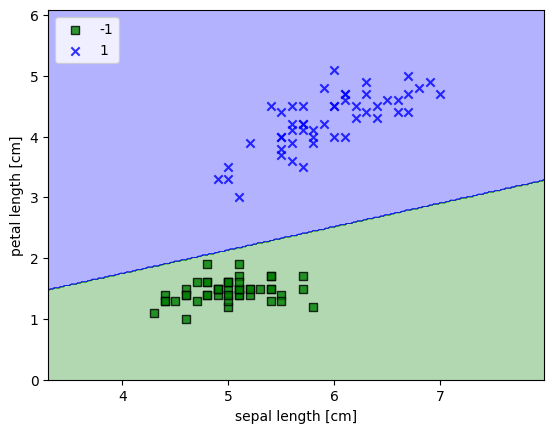

In [19]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('green', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')


plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


plt.show()

The book 